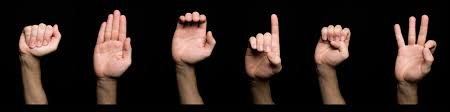

**Yad-tech : CNN Model for ASL pictured signed translation**

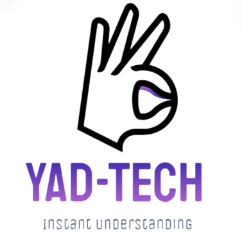

# **Introduction**

In this project, we developed a Convolutional Neural Network (CNN) model for American Sign Language (ASL) alphabet recognition. ASL is a primary means of communication for the Deaf community, and automatic translation systems can bridge communication gaps by interpreting ASL gestures into text. Leveraging a dataset of ASL alphabet images, our model was designed to accurately identify each letter and some common practical gestures, such as "space" and "nothing."

# **1. Importing Libraries**

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
 !unzip '/content/ASLdata.zip'

Streaming output truncated to the last 5000 lines.
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y190.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1900.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1901.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1902.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1903.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1904.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1905.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1906.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1907.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1908.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y1909.jpg  
  inflating: ASL_Dataset/asl_alphabet_train/asl_alphabet_train/Y/Y191.jpg  
  inflating: ASL_Dataset/as

# **2. Data Exploration (EDA)**

In [4]:
# Define paths for training and testing data
train_data_path = '/content/ASL_Dataset/asl_alphabet_train/asl_alphabet_train'
test_data_path = '/content/ASL_Dataset/asl_alphabet_test/asl_alphabet_test'

# List the folders (each folder corresponds to a letter in the training set)
train_classes = os.listdir(train_data_path)

print(f"Training Classes: {train_classes}")
print(f"Total training classes: {len(train_classes)}")

Training Classes: ['C', 'nothing', 'A', 'K', 'R', 'B', 'L', 'Y', 'V', 'N', 'Z', 'del', 'F', 'T', 'space', 'W', 'J', 'E', 'H', 'G', 'U', 'Q', 'O', 'M', 'P', 'X', 'D', 'S', 'I']
Total training classes: 29


In [5]:
# Count the number of images in each class for training data
for class_name in train_classes:
    class_dir = os.path.join(train_data_path, class_name)
    num_images = len(os.listdir(class_dir))
    print(f"Class {class_name} contains {num_images} training images")

Class C contains 3000 training images
Class nothing contains 3000 training images
Class A contains 3000 training images
Class K contains 3000 training images
Class R contains 3000 training images
Class B contains 3000 training images
Class L contains 3000 training images
Class Y contains 3000 training images
Class V contains 3000 training images
Class N contains 3000 training images
Class Z contains 3000 training images
Class del contains 3000 training images
Class F contains 3000 training images
Class T contains 3000 training images
Class space contains 3000 training images
Class W contains 3000 training images
Class J contains 3000 training images
Class E contains 3000 training images
Class H contains 3000 training images
Class G contains 3000 training images
Class U contains 3000 training images
Class Q contains 3000 training images
Class O contains 3000 training images
Class M contains 3000 training images
Class P contains 3000 training images
Class X contains 3000 training images


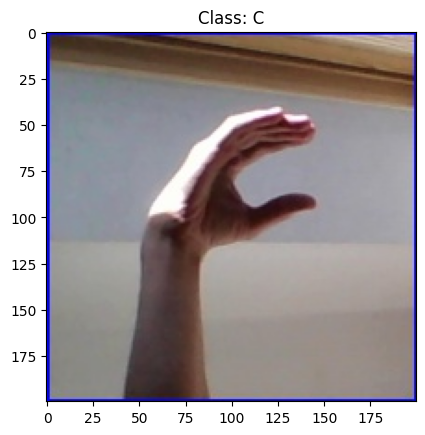

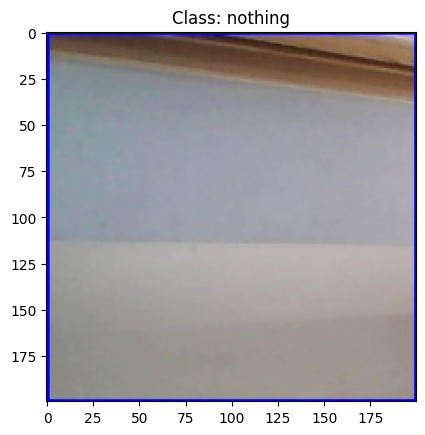

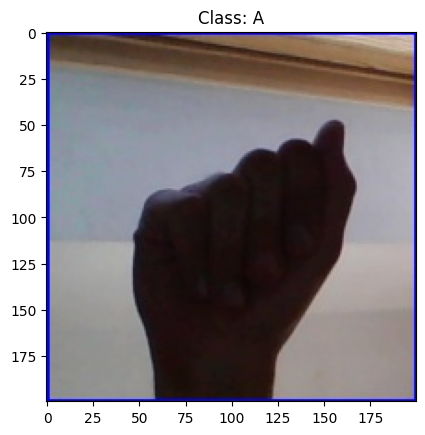

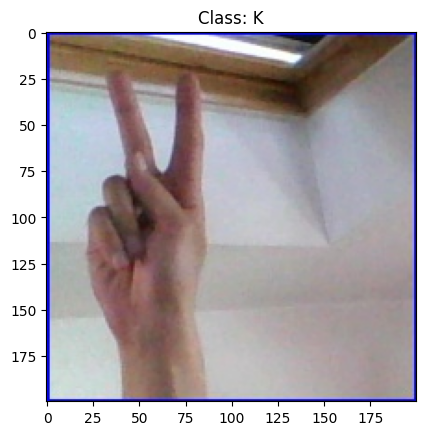

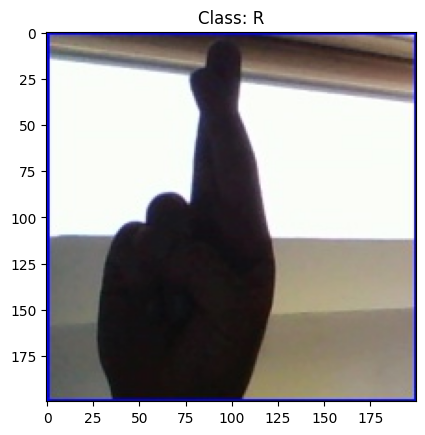

Test Images: ['space_test.jpg', 'B_test.jpg', 'S_test.jpg', 'H_test.jpg', 'Z_test.jpg', 'nothing_test.jpg', 'V_test.jpg', 'C_test.jpg', 'D_test.jpg', 'F_test.jpg', 'E_test.jpg', 'R_test.jpg', 'K_test.jpg', 'Q_test.jpg', 'J_test.jpg', 'O_test.jpg', 'L_test.jpg', 'Y_test.jpg', 'P_test.jpg', 'X_test.jpg', 'W_test.jpg', 'A_test.jpg', 'T_test.jpg', 'U_test.jpg', 'N_test.jpg', 'I_test.jpg', 'M_test.jpg', 'G_test.jpg']


In [6]:
# Display a sample image from each class in the training set
for class_name in train_classes[:5]:  # Display samples for 5 classes
    class_dir = os.path.join(train_data_path, class_name)
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    img = Image.open(sample_image_path)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.show()

# Check test images (from the test folder)
test_images = os.listdir(test_data_path)
print(f"Test Images: {test_images}")

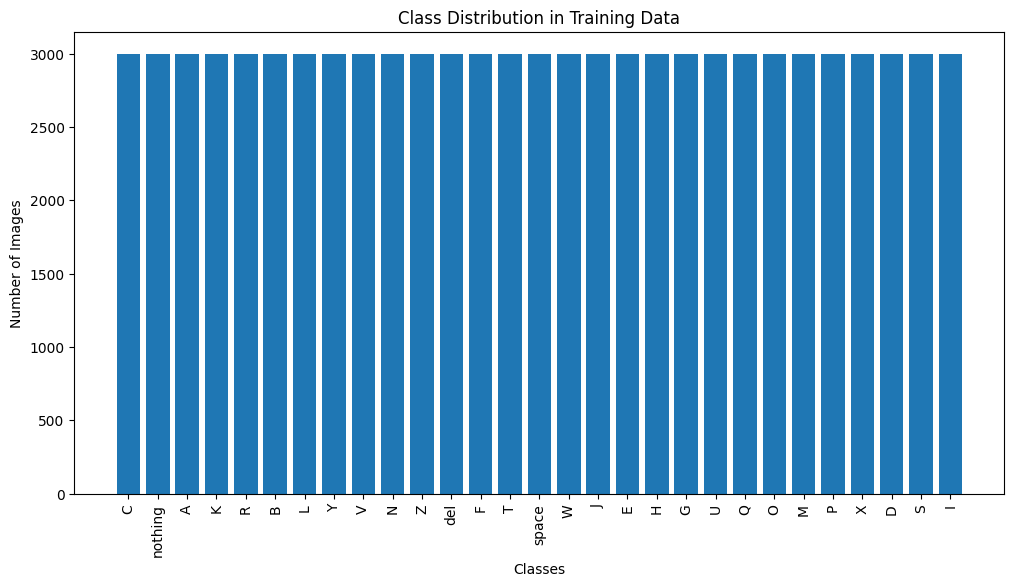

In [7]:
# Count the number of images per class in the training set
class_counts = {}

for class_name in train_classes:
    class_dir = os.path.join(train_data_path, class_name)
    num_images = len(os.listdir(class_dir))
    class_counts[class_name] = num_images

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title('Class Distribution in Training Data')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.show()

We’ll count the number of images for each class and plot a bar chart to visualize the **class distribution.**

Let’s check if all the images have **consistent dimensions.**If not, we may need to resize them during preprocessing.

In [ ]:
from PIL import Image

# Get the size of a few sample images
image_sizes = []

for class_name in train_classes:
    class_dir = os.path.join(train_data_path, class_name)
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])  # Taking one image per class
    img = Image.open(sample_image_path)
    image_sizes.append(img.size)

# Check unique image sizes
unique_sizes = set(image_sizes)
print(f"Unique image sizes: {unique_sizes}")


Unique image sizes: {(200, 200)}


View a Few Samples Per Class

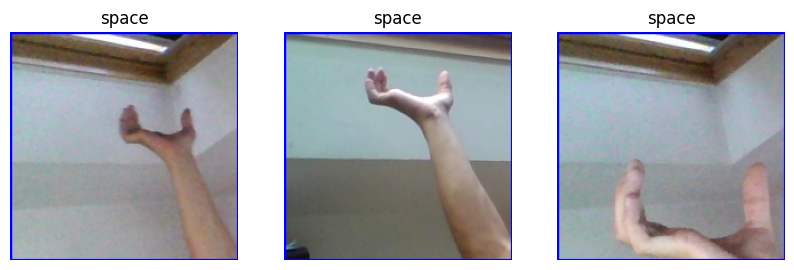

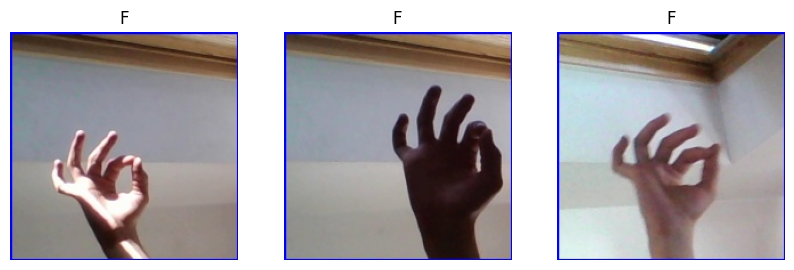

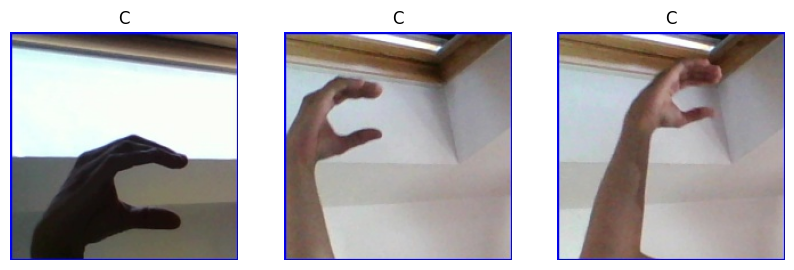

In [ ]:
# Display multiple images per class
def display_images_per_class(class_name, num_images=3):
    class_dir = os.path.join(train_data_path, class_name)
    sample_images = os.listdir(class_dir)[:num_images]

    plt.figure(figsize=(10, 5))
    for i, image_file in enumerate(sample_images):
        img = Image.open(os.path.join(class_dir, image_file))
        plt.subplot(1, num_images, i+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.show()

# Display for a few selected classes
for class_name in train_classes[:3]:  # Display for the first 3 classes
    display_images_per_class(class_name)

# **3. Data Splitting**

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
train_src = '/content/ASL_Dataset/asl_alphabet_train/asl_alphabet_train'

splitfolders.ratio(train_src, output="datasets/asl_alphabet",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values

Copying files: 87000 files [00:23, 3758.96 files/s]


In [ ]:
train_dir = '/content/datasets/asl_alphabet/train'
val_dir = '/content/datasets/asl_alphabet/val'
test_dir  = '/content/datasets/asl_alphabet/test'

# **4.Data Prepocessing**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
target_size = (32,32) # dataset pic = 200x200

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen   = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen  = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=False)

Found 69600 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.
Found 8700 images belonging to 29 classes.


 data generators offer a way to handle large datasets, apply real-time augmentation, manage memory usage, and streamline data flow, all of which contribute to more efficient and effective model training.

 side note: without data generators , we reached the max memory limit for collab

In [ ]:
test_generator.class_indices

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25,
 'del': 26,
 'nothing': 27,
 'space': 28}

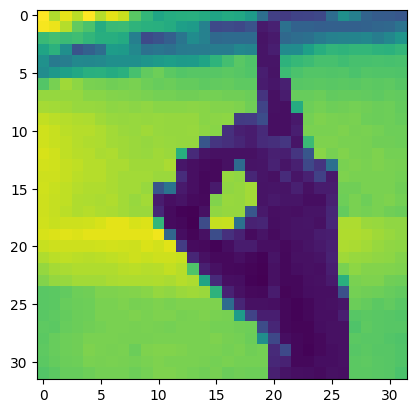

In [ ]:
plt.imshow(train_generator[0][0][0])

In [ ]:
labels = list(train_generator.class_indices.keys())
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
TRAIN_PATH = train_dir
def sample_images(labels):
    # Create Subplots
    y_size = 12
    if(len(labels)<10):
        y_size = y_size * len(labels) / 10
    fig, axs = plt.subplots(len(labels), 9, figsize=(y_size, 13))

    for i, label in enumerate(labels):
        axs[i, 0].text(0.5, 0.5, label, ha='center', va='center', fontsize=8)
        axs[i, 0].axis('off')

        label_path = os.path.join(TRAIN_PATH, label)
        list_files = os.listdir(label_path)

        for j in range(8):
            img_label = cv2.imread(os.path.join(label_path, list_files[j]))
            img_label = cv2.cvtColor(img_label, cv2.COLOR_BGR2RGB)
            axs[i, j+1].imshow(img_label)
            axs[i, j+1].axis("off")

    # Title
    plt.suptitle("Sample Images in ASL Alphabet Dataset", x=0.55, y=0.92)

    # Show
    plt.show()

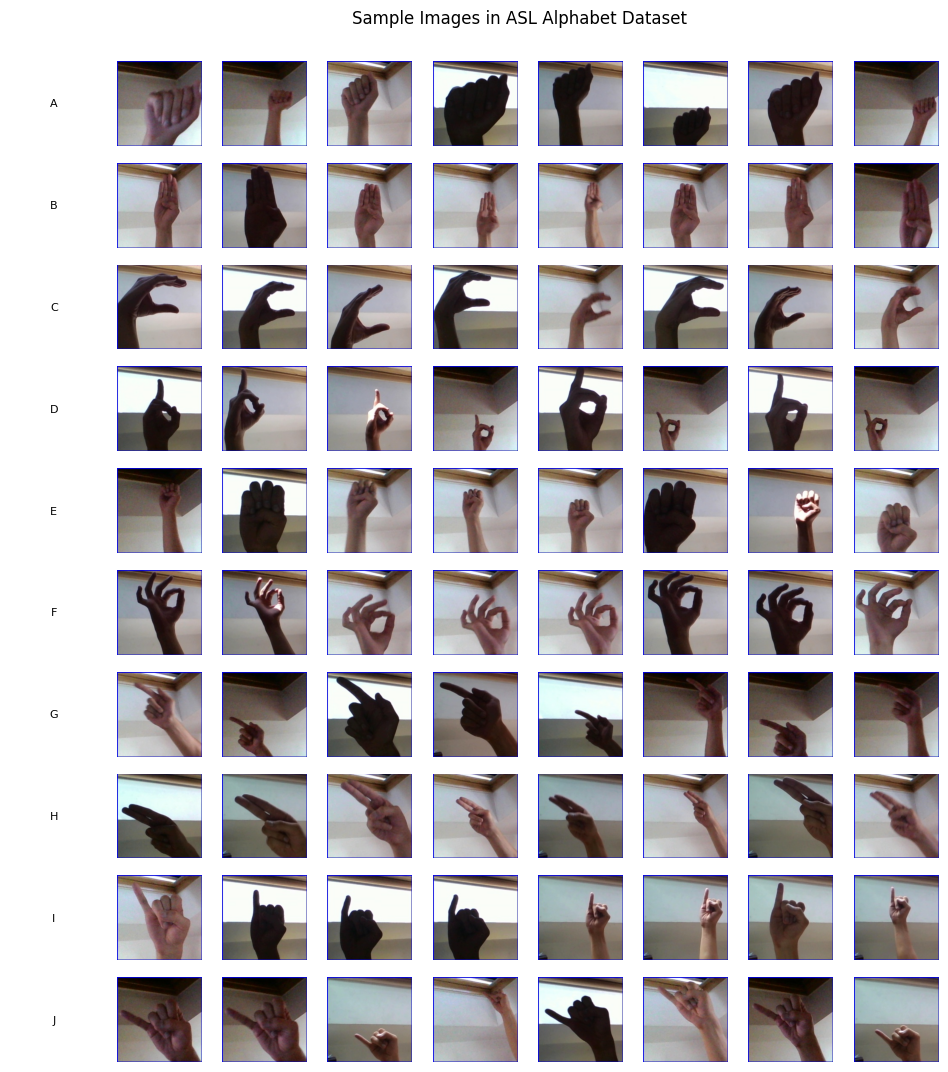

In [ ]:
sample_images(labels[:10])

In [ ]:
num_classes = len(labels)
input_shape = (32,32,1)

# **5.Model Building**

In [ ]:
#Build Model
model = models.Sequential()
# 1st convolution layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 2nd convolution layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 3rd convolution layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# fully-connected layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,581 (1.37 MB)

 Trainable params: 359,133 (1.37 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define checkpoint path
checkpoint_path = "best_model.keras"

# Create ModelCheckpoint callback
checkpoint = ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')

Check points to check when the model stops improving

# **6.Model training**

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[checkpoint])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2168/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5426 - loss: 1.5423
Epoch 1: val_accuracy improved from -inf to 0.66264, saving model to best_model.keras
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 87s 37ms/step - accuracy: 0.5433 - loss: 1.5397 - val_accuracy: 0.6626 - val_loss: 1.6247
Epoch 2/10
2168/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9344 - loss: 0.1894
Epoch 2: val_accuracy improved from 0.66264 to 0.77724, saving model to best_model.keras
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 67s 31ms/step - accuracy: 0.9344 - loss: 0.1893 - val_accuracy: 0.7772 - val_loss: 1.2305
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9639 - loss: 0.1094
Epoch 3: val_accuracy improved from 0.77724 to 0.78851, saving model to best_model.keras
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 69s 32ms/step - accuracy: 0.9639 - loss: 0.1094 - val_accuracy: 0.7885 - val_loss: 1.0767
Epoch 4/10
2173/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9740 - loss: 0.0814
Epoch 4: val_accuracy improv

In [ ]:
scores = model.evaluate(test_generator)
print('Test loss: ', scores[0])
print('Test accuracy: ', scores[1])

272/272 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9847 - loss: 0.0497
Test loss:  0.061196260154247284
Test accuracy:  0.9812643527984619


The test_generator provides test data in batches, making this evaluation memory-efficient.

In [ ]:
model.save("asl_alphabet_cnn.h5")

# **7.Evalution**

plot losss and accuracy:

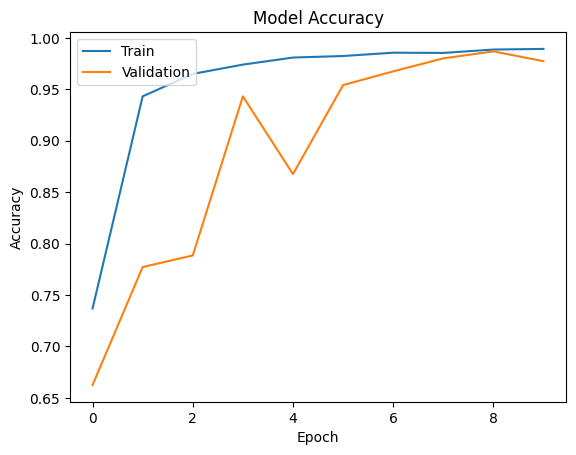

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

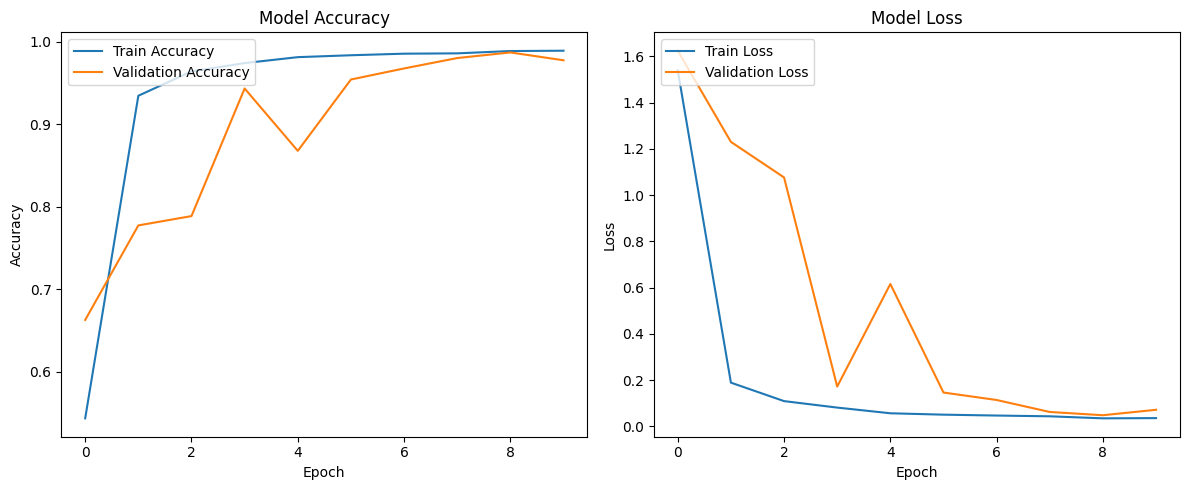

In [8]:
import matplotlib.pyplot as plt

# Manually extracted data from your output
train_accuracy = [0.5433, 0.9344, 0.9639, 0.9740, 0.9812, 0.9835, 0.9854, 0.9858, 0.9886, 0.9890]
val_accuracy = [0.6626, 0.7772, 0.7885, 0.9432, 0.8676, 0.9541, 0.9675, 0.9801, 0.9869, 0.9774]
train_loss = [1.5397, 0.1893, 0.1094, 0.0814, 0.0568, 0.0508, 0.0470, 0.0437, 0.0349, 0.0359]
val_loss = [1.6247, 1.2305, 1.0767, 0.1724, 0.6159, 0.1465, 0.1142, 0.0624, 0.0484, 0.0719]

# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


**Model Accuracy**

The training accuracy rapidly increased, reaching nearly 100% within the first few epochs. This indicates that the model quickly learned patterns in the training data.


Validation accuracy shows an overall upward trend, although it fluctuates slightly, especially in the early epochs. By the final epochs, validation accuracy stabilizes and aligns closely with training accuracy, suggesting that the model generalizes well without overfitting.


**Model Loss**

The training loss consistently decreased and approached zero, indicating that the model is minimizing errors on the training data effectively.


The validation loss shows a steep decline initially, mirroring the validation accuracy improvement. While it fluctuates slightly across epochs, it ultimately stabilizes close to the training loss, which further indicates good generalization.

----

**Note**: We initially missed plotting the loss at the end of training, but since we have the training output, we manually extracted the values here to avoid retraining the model given our tight deadline. We’ve also plotted the accuracy to verify it matches the one obtained using the history object.

Confuision Matrix

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
import seaborn as sns

272/272 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step
Confusion Matrix
[[294   0   1   0   2   3   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0 299   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 300   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 298   0   1   0   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [ 12   2   0   0 284   1   0   0   1   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 300   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 293   7   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1 299   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   

<Axes: >

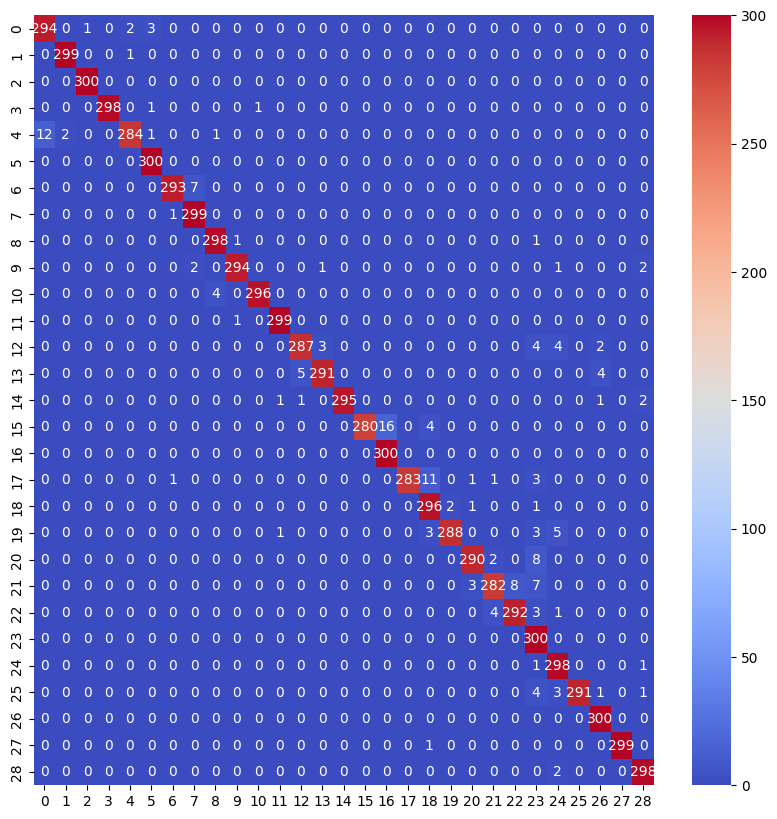

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
plt.figure(figsize = (10,10))
sns.heatmap(confusion_matrix(test_generator.classes, y_pred), annot=True, fmt='g',cmap='coolwarm')

The confusion matrix shows that the model performs well, with high accuracy across most ASL alphabet classes, evidenced by strong values along the diagonal. Minor misclassifications occur between some visually similar classes, but overall, the model generalizes effectively with minimal errors. Fine-tuning or targeted data augmentation could further improve accuracy for the few challenging classes.


Classification Report

In [ ]:
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
print('Classification Report')
target_names = list(train_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           A       0.96      0.98      0.97       300
           B       0.99      1.00      1.00       300
           C       1.00      1.00      1.00       300
           D       1.00      0.99      1.00       300
           E       0.99      0.95      0.97       300
           F       0.98      1.00      0.99       300
           G       0.99      0.98      0.98       300
           H       0.97      1.00      0.98       300
           I       0.98      0.99      0.99       300
           J       0.99      0.98      0.99       300
           K       1.00      0.99      0.99       300
           L       0.99      1.00      1.00       300
           M       0.98      0.96      0.97       300
           N       0.99      0.97      0.98       300
           O       1.00      0.98      0.99       300
           P       1.00      0.93      0.97       300
           Q       0.95      1.00      0.97       300
     

the model achieved excellent performance across all ASL alphabet classes, with an overall accuracy of 98%. Key metrics, including precision, recall, and F1-score, are consistently high, with most classes scoring above 0.97 in each metric.


**Summary of Key Metrics:**


Precision: Indicates the model's accuracy in predicting each specific class. Most classes achieved near-perfect precision, indicating few false positives.


Recall: Measures how well the model correctly identified each class. Again, high recall values (mostly close to or at 1.00) show strong performance, with only minor variations in a few classes.


F1-Score: The harmonic mean of precision and recall; here, it also shows high values, confirming balanced performance across classes.


Observations:
Classes like C, D, F, L, nothing have perfect or nearly perfect scores in all metrics, indicating the model recognizes them with very high accuracy.

A few classes, such as P, R, X, show slightly lower recall or F1-scores, suggesting minor misclassifications, due to similarity in sign shapes.


Overall, the model generalizes well, and minor improvements can be made by enhancing specific class recognition with additional data or further fine-tuning.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


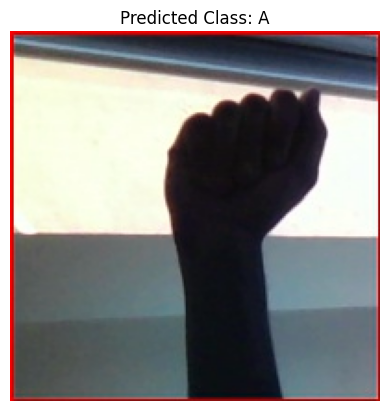

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt


# Load the trained model
model = load_model('/content/asl_alphabet_cnn.h5')

# Define the label dictionary
labels_dict = {chr(i + 65): i for i in range(26)}  # A-Z
labels_dict.update({'del': 26, 'nothing': 27, 'space': 28})  # Additional classes

# Function to preprocess the image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
    img = cv2.resize(img, (32, 32))  # Resize to match model input size
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=(0, -1))  # Add batch and channel dimensions
    return img

# Function to predict the class of an image and display it
def predict_and_show_image(image_path):
    preprocessed_img = preprocess_image(image_path)  # Preprocess the image
    original_img = cv2.imread(image_path)  # Load the original image
    prediction = model.predict(preprocessed_img)  # Make prediction
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class index
    predicted_label = list(labels_dict.keys())[list(labels_dict.values()).index(predicted_class)]  # Get the class label

    # Display the image with the predicted label
    plt.imshow(original_img, cmap='gray')  # Show in grayscale
    plt.title(f'Predicted Class: {predicted_label}')
    plt.axis('off')
    plt.show()

# Example usage
image_path = '/content/A_test.jpg'  # Replace with the path to your image
predict_and_show_image(image_path)

# **Closing**

In summary,The model achieved high accuracy (98%) on test data, indicating strong performance in recognizing ASL alphabet letters. Our data preprocessing included resizing images and augmenting the training set with techniques such as horizontal flipping. Through the training process, we observed that both accuracy and loss for the training and validation sets converged smoothly, showing good generalization without signs of overfitting. These results highlight the model's potential for real-time ASL recognition tasks, making it a promising step toward assistive communication technology.

Work done by the **Yad-Tech team**

# Dead Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print("wake up")

wake up
